# Resampling Datetime Data
- Daniel Barella
- 3/27/23

For this assignment, you will be working with a modified version of [weather data from London from Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data). 

The assignment is split into 3 parts:

- Part 1: Load the data and create a datetime index

- Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data

## Part 1) Load the data and make a datetime index.
- Use the modified version of the data provided here:
    - Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
    - Raw URL:
        - https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv 

You must first load in the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!
        

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.
Note: you may want to make a temporary DataFrame that you will use to answer this question only.

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

### Visualization Issue Workaround
- NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:

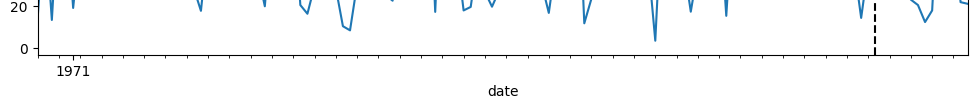

- To get around this issue, first create your fig and ax using plt.subplots() 
    - Now you may use pandas .plot method to plot onto this figure by adding "ax=ax" to .plot. 

In [1]:
# fig, ax = plt.subplots(figsize=(12,3))
# df.plot(ax=ax)

## Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With a title of "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Have the major ticks' labels rotated 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.

## Q2: Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.

- Find the date and corresponding value for the max mean temp.

- Plot the feature and time period that corresponds to the question.

    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.

- and what was the temperature?

## Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With a title of "Average Temperature"
        - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Have the major ticks' labels rotated 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

# Part 1) Load the data and make a datetime index.


In [3]:
df = pd.read_csv('/Users/danielbarella/Downloads/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


### 1. Convert the date column to datetime dtype.


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### 2. Set the date column as the index.


In [5]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


### 3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth

In [6]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


### 4. Impute any missing values.
   - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [7]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [9]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)


## Q1: What month had the most precipitation between 2000 through 2010?

### Resample the data as Monthly frequency.


In [11]:
ts = df['precipitation'].copy()

In [12]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [13]:
ts  = df.loc["2000":"2010",'precipitation']
ts

date
2000-01-01   0.00
2000-01-02   0.20
2000-01-03   6.00
2000-01-04   0.20
2000-01-05   0.80
             ... 
2010-12-27   5.00
2010-12-28   0.40
2010-12-29   1.40
2010-12-30   0.00
2010-12-31   0.00
Name: precipitation, Length: 4018, dtype: float64

In [14]:
ts_M_res = ts.resample("M").sum()
ts_M_res.name = 'Resampled'
ts_M_res.head()

date
2000-01-31   14.30
2000-02-29   62.20
2000-03-31   13.40
2000-04-30   71.80
2000-05-31   68.40
Freq: M, Name: Resampled, dtype: float64

### Find the date and corresponding value for the max precipitation.


In [15]:
max_date = ts_M_res.idxmax()
max_value = round(ts_M_res.loc[max_date], 2)
print(f"The highest monthly precipitation was {max_value} inches, which occurred on {max_date.strftime('%B %Y')}")


The highest monthly precipitation was 138.4 inches, which occurred on November 2009


### Plot the feature and time period that corresponds to the question.


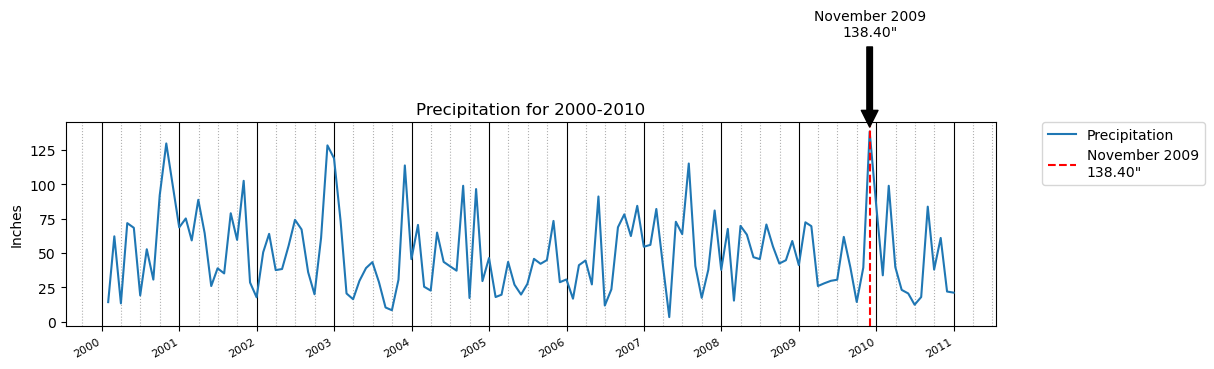

In [16]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 3))

# Plot the time series
ax.plot(ts_M_res)

# Add a vertical line at the max date
ax.axvline(x=max_date, linestyle='--', color='red')

# Add a label for the max date and value
#max_label = max_date.strftime('%B %Y') + '\nMax value: {:.2f}'.format(max_value)
max_label = max_date.strftime('%B %Y') + '\n{:.2f}"'.format(max_value)
ax.annotate(max_label, xy=(max_date, max_value), xytext=(max_date, max_value*1.5),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Add labels and title
ax.set_title("Precipitation for 2000-2010")
ax.set_ylabel("Inches")

# Customize the major xaxis ticks and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', which='major', labelsize=8, rotation=90)

# Customize the minor xaxis ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.tick_params(axis='x', which='minor', size=0)

# Make major/minor gridlines visually distinct
ax.grid(which='minor', axis='x', ls=':')
ax.grid(which='major', axis='x', color='k')

# Auto-format the xaxis labels to improve readability
fig.autofmt_xdate()

# Add a legend for the max date and value label
ax.legend(['Precipitation', max_label], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
plt.show()


# Q2: Which year between 2000-2020 had the coolest average temperature?

### Resample the data as Yearly frequency.



In [17]:
ts_year = df['mean_temp'].copy()

In [18]:
ts_year.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [19]:
ts_year  = df.loc["2000":"2020",'mean_temp']
ts_year

date
2000-01-01    7.00
2000-01-02    7.90
2000-01-03    9.40
2000-01-04    7.00
2000-01-05    6.40
              ... 
2020-12-27    7.50
2020-12-28    1.10
2020-12-29    2.60
2020-12-30    2.70
2020-12-31   -0.80
Name: mean_temp, Length: 7671, dtype: float64

In [20]:
ts_Y_res = ts_year.resample("A").mean()
ts_Y_res.name = 'Resampled'
ts_Y_res

date
2000-12-31   11.58
2001-12-31   11.33
2002-12-31   12.08
2003-12-31   12.11
2004-12-31   11.90
2005-12-31   11.82
2006-12-31   12.29
2007-12-31   11.94
2008-12-31   11.33
2009-12-31   11.72
2010-12-31   10.66
2011-12-31   12.37
2012-12-31   11.30
2013-12-31   11.17
2014-12-31   12.66
2015-12-31   12.12
2016-12-31   11.91
2017-12-31   12.24
2018-12-31   12.50
2019-12-31   12.21
2020-12-31   12.72
Freq: A-DEC, Name: Resampled, dtype: float64

### Find the date and corresponding value for the max mean temp.



In [21]:
max_date = ts_Y_res.idxmin()
max_value = round(ts_Y_res.loc[max_date], 2)
print(f"The coolest average temperature was {max_value} degrees Celsius (°C), which occurred in {max_date.strftime('%Y')}")


The coolest average temperature was 10.66 degrees Celsius (°C), which occurred in 2010


### Plot the feature and time period that corresponds to the question.



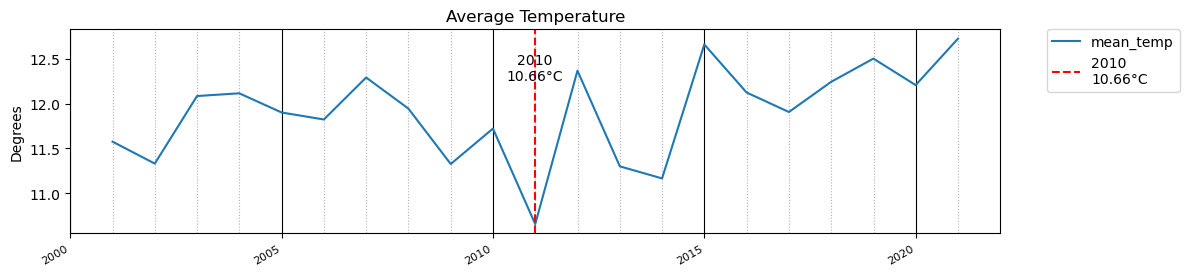

In [28]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 3))

# Plot the time series
ax.plot(ts_Y_res)

# Add a vertical line at the max date
ax.axvline(x=max_date, linestyle='--', color='red')

# Add a label for the max date and value
max_label = max_date.strftime('%Y') + '\n{:.2f}°C'.format(max_value)
ax.annotate(max_label, xy=(max_date, max_value), xytext=(max_date, max_value*1.15), ha='center'),

# Add labels and title
ax.set_title("Average Temperature")
ax.set_ylabel("Degrees")

# Customize the major xaxis ticks and labels
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', which='major', labelsize=8, rotation=90)

# Customize the minor xaxis ticks
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='x', which='minor', size=0)

# Make major/minor gridlines visually distinct
ax.grid(which='minor', axis='x', ls=':')
ax.grid(which='major', axis='x', color='k')

# Auto-format the xaxis labels to improve readability
fig.autofmt_xdate()

# Add a legend for the max date and value label
ax.legend(['mean_temp', max_label], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)


# Show the plot
plt.show()
